In [750]:
import torch 
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Criando dicionário de args

In [751]:
args = {
    'epoch_num': 50,    
    'lr': 1e-3,         
    'weight_decay': 0.02, 
    'batch_size': 16,    
}

# Verificando se o dispositivo é compatível com CUDA


In [752]:
if torch.cuda.is_available():
    args['device'] = torch.device('cuda')
else:
    args['device'] = torch.device('cpu')

print(f'Dispositivo disponível: {args["device"]}')


Dispositivo disponível: cuda


# Carregar os dados de treino e teste

In [753]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

# Fazendo o mesmo pré-processamento que foi feito no notebook 01_main.ipynb


## Para o treinamento

### Coluna Cabin


In [754]:
option = 1

if option == 1:
    train_data_processed = train_data.drop(columns=['Cabin'])
    print("\nOpção 1: Coluna 'Cabin' foi removida.")

elif option == 2:
    train_data_processed = train_data.copy()
    train_data_processed['Cabin'] = train_data_processed['Cabin'].fillna('Unknown')
    print("\nOpção 2: Valores ausentes preenchidos com 'Unknown'.")

elif option == 3:
    train_data_processed = train_data.copy()
    train_data_processed.drop(columns=['Cabin'], inplace=True)
    train_data_processed['Has_Cabin'] = train_data['Cabin'].notnull().astype(int)
    print("\nOpção 3: Coluna 'Has_Cabin' criada para indicar presença de cabine.")

elif option == 4:
    train_data_processed = train_data.dropna(subset=['Cabin'])
    print(f"\nOpção 4: Linhas com valores ausentes removidas. Restam {len(train_data_processed)} linhas.")
    
else:
    print("Opção inválida. Escolha entre 1, 2, 3 ou 4.")
    train_data_processed = None

print(tabulate(train_data_processed.head(), headers='keys', showindex=True, tablefmt='grid'))

print("\nValores ausentes após o tratamento:")
display(train_data_processed.isnull().sum())


Opção 1: Coluna 'Cabin' foi removida.
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Embarked   |
+====+===============+============+==========+=====================================================+========+=======+=========+=========+==================+=========+============+
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | S          |
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+
|  1 |             2 |          1 |        1 | Cumings, Mrs. 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

### Coluna Age

In [755]:
option_age = 3

mean_age = None

if option_age == 1:
    data_age_processed = train_data_processed.drop(columns=['Age'])
    print("\nOpção 1: Coluna 'Age' foi removida.")

elif option_age == 2:
    data_age_processed = train_data_processed.copy()
    median_age = train_data_processed['Age'].median()
    data_age_processed['Age'] = data_age_processed['Age'].fillna(median_age)
    print(f"\nOpção 2: Valores ausentes preenchidos com a mediana ({median_age}).")

elif option_age == 3:
    data_age_processed = train_data_processed.copy()
    mean_age = train_data_processed['Age'].mean()
    data_age_processed['Age'] = data_age_processed['Age'].fillna(mean_age)
    print(f"\nOpção 3: Valores ausentes preenchidos com a média ({mean_age:.2f}).")

elif option_age == 4:
    data_age_processed = train_data_processed.dropna(subset=['Age'])
    print(f"\nOpção 4: Linhas com valores ausentes removidas. Restam {len(data_age_processed)} linhas.")

else:
    print("Opção inválida. Escolha entre 1, 2, 3 ou 4.")
    data_age_processed = None

print(tabulate(data_age_processed.head(), headers='keys', showindex=True, tablefmt='grid'))

print("\nValores ausentes após o tratamento:")
display(data_age_processed.isnull().sum())


Opção 3: Valores ausentes preenchidos com a média (29.70).
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Embarked   |
+====+===============+============+==========+=====================================================+========+=======+=========+=========+==================+=========+============+
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | S          |
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+
|  1 |             2 |          1 |     

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

### Coluna Embarked


In [756]:
data_embarked_processed = data_age_processed.dropna(subset=['Embarked'])

processed_data = data_embarked_processed

print(tabulate(processed_data.head(), headers='keys', showindex=True, tablefmt='grid'))

print("\nValores ausentes após o tratamento:")
display(processed_data.isnull().sum())

+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Embarked   |
+====+===============+============+==========+=====================================================+========+=======+=========+=========+==================+=========+============+
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | S          |
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+
|  1 |             2 |          1 |        1 | Cumings, Mrs. John Bradley (Florence Briggs Thayer) |

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Para o teste


In [757]:
print("\nValores Ausentes:")
display(test_data.isnull().sum())


Valores Ausentes:


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Coluna Age


In [758]:
option_age_test = 3

if option_age_test == 1:
    test_data_processed = test_data.drop(columns=['Age'])
    print("\nOpção 1: Coluna 'Age' foi removida.")

elif option_age_test == 2:
    test_data_processed = test_data.copy()
    median_age = test_data_processed['Age'].median()
    test_data_processed['Age'] = test_data_processed['Age'].fillna(median_age)
    print(f"\nOpção 2: Valores ausentes preenchidos com a mediana ({median_age}).")

elif option_age_test == 3:
    test_data_processed = test_data.copy()
    test_data_processed['Age'] = test_data_processed['Age'].fillna(mean_age)
    print(f"\nOpção 3: Valores ausentes preenchidos com a média do treino ({mean_age:.2f}).")

else:
    print("Opção inválida. Escolha entre 1, 2 ou 3.")
    test_data_processed = None

print(tabulate(test_data_processed.head(), headers='keys', showindex=True, tablefmt='grid'))

print("\nValores ausentes após o tratamento:")
display(test_data_processed.isnull().sum())


Opção 3: Valores ausentes preenchidos com a média do treino (29.70).
+----+---------------+----------+----------------------------------------------+--------+-------+---------+---------+----------+---------+---------+------------+
|    |   PassengerId |   Pclass | Name                                         | Sex    |   Age |   SibSp |   Parch |   Ticket |    Fare |   Cabin | Embarked   |
+====+===============+==========+==============================================+========+=======+=========+=========+==========+=========+=========+============+
|  0 |           892 |        3 | Kelly, Mr. James                             | male   |  34.5 |       0 |       0 |   330911 |  7.8292 |     nan | Q          |
+----+---------------+----------+----------------------------------------------+--------+-------+---------+---------+----------+---------+---------+------------+
|  1 |           893 |        3 | Wilkes, Mrs. James (Ellen Needs)             | female |  47   |       1 |       0 |   

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Coluna Cabin

In [759]:
option_cabin_test = 1

if option_cabin_test == 1:
    test_data_processed = test_data_processed.drop(columns=['Cabin'])
    print("\nOpção 1: Coluna 'Cabin' foi removida.")

elif option_cabin_test == 2:
    test_data_processed = test_data_processed.copy()
    test_data_processed.drop(columns=['Cabin'], inplace=True)
    test_data_processed['Has_Cabin'] = test_data['Cabin'].notnull().astype(int)
    print("\nOpção 3: Coluna 'Has_Cabin' criada para indicar presença de cabine.")
    
else:
    print("Opção inválida. Escolha entre 1 e 2")
    test_data_processed = None

print(tabulate(test_data_processed.head(), headers='keys', showindex=True, tablefmt='grid'))

print("\nValores ausentes após o tratamento:")
display(test_data_processed.isnull().sum())


Opção 1: Coluna 'Cabin' foi removida.
+----+---------------+----------+----------------------------------------------+--------+-------+---------+---------+----------+---------+------------+
|    |   PassengerId |   Pclass | Name                                         | Sex    |   Age |   SibSp |   Parch |   Ticket |    Fare | Embarked   |
+====+===============+==========+==============================================+========+=======+=========+=========+==========+=========+============+
|  0 |           892 |        3 | Kelly, Mr. James                             | male   |  34.5 |       0 |       0 |   330911 |  7.8292 | Q          |
+----+---------------+----------+----------------------------------------------+--------+-------+---------+---------+----------+---------+------------+
|  1 |           893 |        3 | Wilkes, Mrs. James (Ellen Needs)             | female |  47   |       1 |       0 |   363272 |  7      | S          |
+----+---------------+----------+----------------

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

 ### Tratamento da coluna Fare: Preenchimento do valor ausente com a média devido ao conjunto de teste

In [760]:
media_fare = test_data_processed['Fare'].mean()
test_data_processed['Fare'] = test_data_processed['Fare'].fillna(media_fare)
print(f"\nValores ausentes em 'Fare' preenchidos com a média ({media_fare:.2f})")

print(tabulate(test_data_processed.head(), headers='keys', showindex=True, tablefmt='grid'))

print("\nValores ausentes após o tratamento:")
display(test_data_processed.isnull().sum())


Valores ausentes em 'Fare' preenchidos com a média (35.63)
+----+---------------+----------+----------------------------------------------+--------+-------+---------+---------+----------+---------+------------+
|    |   PassengerId |   Pclass | Name                                         | Sex    |   Age |   SibSp |   Parch |   Ticket |    Fare | Embarked   |
+====+===============+==========+==============================================+========+=======+=========+=========+==========+=========+============+
|  0 |           892 |        3 | Kelly, Mr. James                             | male   |  34.5 |       0 |       0 |   330911 |  7.8292 | Q          |
+----+---------------+----------+----------------------------------------------+--------+-------+---------+---------+----------+---------+------------+
|  1 |           893 |        3 | Wilkes, Mrs. James (Ellen Needs)             | female |  47   |       1 |       0 |   363272 |  7      | S          |
+----+---------------+------

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Deep Learning

## Antes de tudo, vamos realizar o encoding das colunas categóricas e a normalização dos dados


In [761]:
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
scaler = StandardScaler()

le_sex.fit(processed_data['Sex'])
le_embarked.fit(processed_data['Embarked'])

numeric_columns = ['Age', 'Fare', 'SibSp', 'Parch']
scaler.fit(processed_data[numeric_columns])

def prepare_data_for_nn(data, is_training=True):

    processed_data = data.copy()
    
    columns_to_drop = ['PassengerId', 'Name', 'Ticket']
    processed_data = processed_data.drop(columns=columns_to_drop, errors='ignore')
    
    processed_data['Sex'] = le_sex.transform(processed_data['Sex']).astype('float32')
    processed_data['Embarked'] = le_embarked.transform(processed_data['Embarked']).astype('float32')
    
    numeric_columns = ['Age', 'Fare', 'SibSp', 'Parch']
    processed_data[numeric_columns] = scaler.transform(processed_data[numeric_columns]).astype('float32')
    
    if 'Pclass' in processed_data.columns:
        processed_data['Pclass'] = processed_data['Pclass'].astype('float32')
    if 'Has_Cabin' in processed_data.columns:
        processed_data['Has_Cabin'] = processed_data['Has_Cabin'].astype('float32')
    if 'Survived' in processed_data.columns:
        processed_data['Survived'] = processed_data['Survived'].astype('float32')
    
    output_file = '../data/train_processed.csv' if is_training else '../data/test_processed.csv'
    processed_data.to_csv(output_file, index=False)
    print(f"\nDados processados salvos em: {output_file}")
    print("\nPrimeiras linhas dos dados processados:")
    print(tabulate(processed_data.head(), headers='keys', tablefmt='grid'))

In [762]:
prepare_data_for_nn(processed_data, is_training=True)


Dados processados salvos em: ../data/train_processed.csv

Primeiras linhas dos dados processados:
+----+------------+----------+-------+-----------+-----------+-----------+-----------+------------+
|    |   Survived |   Pclass |   Sex |       Age |     SibSp |     Parch |      Fare |   Embarked |
+====+============+==========+=======+===========+===========+===========+===========+============+
|  0 |          0 |        3 |     1 | -0.590495 |  0.43135  | -0.474326 | -0.50024  |          2 |
+----+------------+----------+-------+-----------+-----------+-----------+-----------+------------+
|  1 |          1 |        1 |     0 |  0.643971 |  0.43135  | -0.474326 |  0.788947 |          0 |
+----+------------+----------+-------+-----------+-----------+-----------+-----------+------------+
|  2 |          1 |        3 |     0 | -0.281878 | -0.475199 | -0.474326 | -0.48665  |          2 |
+----+------------+----------+-------+-----------+-----------+-----------+-----------+------------+
|

In [763]:
prepare_data_for_nn(test_data_processed, is_training=False)


Dados processados salvos em: ../data/test_processed.csv

Primeiras linhas dos dados processados:
+----+----------+-------+-----------+-----------+-----------+-----------+------------+
|    |   Pclass |   Sex |       Age |     SibSp |     Parch |      Fare |   Embarked |
+====+==========+=======+===========+===========+===========+===========+============+
|  0 |        3 |     1 |  0.373932 | -0.475199 | -0.474326 | -0.488579 |          1 |
+----+----------+-------+-----------+-----------+-----------+-----------+------------+
|  1 |        3 |     0 |  1.33836  |  0.43135  | -0.474326 | -0.505273 |          2 |
+----+----------+-------+-----------+-----------+-----------+-----------+------------+
|  2 |        2 |     1 |  2.49567  | -0.475199 | -0.474326 | -0.451165 |          1 |
+----+----------+-------+-----------+-----------+-----------+-----------+------------+
|  3 |        3 |     1 | -0.204724 | -0.475199 | -0.474326 | -0.471802 |          2 |
+----+----------+-------+-------

## Agora, criaremos a classe de Dataset

In [764]:
class TitanicDataset:
    def __init__(self, arquivo_csv, is_train=True):

        self.dados = pd.read_csv(arquivo_csv)
        self.is_train = is_train
        
        if is_train:
            self.X = torch.tensor(self.dados.drop('Survived', axis=1).values, dtype=torch.float32)
            self.y = torch.tensor(self.dados['Survived'].values, dtype=torch.float32).reshape(-1, 1)
        else:
            self.X = torch.tensor(self.dados.values, dtype=torch.float32)
            self.y = None
    
    def __len__(self):
        return len(self.dados)
    
    def __getitem__(self, idx):
        if self.is_train:
            return self.X[idx], self.y[idx]
        return self.X[idx]

In [765]:
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE

dataset_train = TitanicDataset('../data/train_processed.csv', is_train=True)
dataset_test = TitanicDataset('../data/test_processed.csv', is_train=False)

X = dataset_train.X
y = dataset_train.y.squeeze()

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, val_idx = next(sss.split(X, y))

X_train, X_val = X[train_idx], X[val_idx]
y_train, y_val = y[train_idx], y[val_idx]

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

train_dataset = TensorDataset(torch.FloatTensor(X_train_balanced), 
                            torch.FloatTensor(y_train_balanced).reshape(-1, 1))
val_dataset = TensorDataset(torch.FloatTensor(X_val), 
                          torch.FloatTensor(y_val).reshape(-1, 1))

train_loader = DataLoader(train_dataset, batch_size=args['batch_size'], shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=args['batch_size'], shuffle=False)
test_loader = DataLoader(dataset_test, batch_size=args['batch_size'], shuffle=False)

print("Distribuição das classes:")
print("\nAntes do balanceamento (treino):")
print(pd.Series(y_train.numpy()).value_counts(normalize=True))
print("\nDepois do balanceamento (treino):")
print(pd.Series(y_train_balanced).value_counts(normalize=True))
print("\nValidação:")
print(pd.Series(y_val.numpy()).value_counts(normalize=True))

print(f'\nTamanho do treino: {len(train_dataset)}')
print(f'Tamanho da validação: {len(val_dataset)}')
print(f'Tamanho do teste: {len(dataset_test)}')

Distribuição das classes:

Antes do balanceamento (treino):
0.0    0.61744
1.0    0.38256
Name: proportion, dtype: float64

Depois do balanceamento (treino):
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64

Validação:
0.0    0.617978
1.0    0.382022
Name: proportion, dtype: float64

Tamanho do treino: 878
Tamanho da validação: 178
Tamanho do teste: 418


In [766]:
for batch in train_loader:
    dados, rotulos = batch
    print('## Dimensionalidade do batch ##')
    print(f'Dados: {dados.size()}, Rótulos: {rotulos.size()}')
    break

## Dimensionalidade do batch ##
Dados: torch.Size([16, 7]), Rótulos: torch.Size([16, 1])


## Definindo a arquitetura da rede


In [767]:
class TitanicModel(nn.Module):
    def __init__(self):
        super(TitanicModel, self).__init__()
        
        self.network = nn.Sequential(
            nn.Linear(7, 256),
            nn.LeakyReLU(negative_slope=0.02),
            nn.BatchNorm1d(256),
            nn.Dropout(0.5), 
            
            nn.Linear(256, 128),
            nn.LeakyReLU(negative_slope=0.02),
            nn.BatchNorm1d(128),
            nn.Dropout(0.5),
            
            nn.Linear(128, 64),
            nn.LeakyReLU(negative_slope=0.02),
            nn.BatchNorm1d(64),
            nn.Dropout(0.5),
            
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
        
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        return self.network(x)

## Criando a rede

In [768]:
net = TitanicModel().to(args['device'])

## Definindo loss e otimizador

In [769]:
criterion = nn.BCELoss(reduction='mean').to(args['device'])  

def mixup_data(x, y, alpha=0.2):
    lam = np.random.beta(alpha, alpha)
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(args['device'])
    mixed_x = lam * x + (1 - lam) * x[index]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,
    patience=10,
    verbose=True,
    min_lr=1e-6
)

c:\Users\breno\OneDrive\Documentos\GitHub\facprj-titanic\venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


## Fluxo de Treinamento e validação

In [770]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from collections import deque

def treinar_epoca(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    inicio = time.time()
    
    for batch in train_loader:
        dados, rotulos = batch
        dados, rotulos = dados.to(device), rotulos.to(device).float()
        
        mixed_dados, rotulos_a, rotulos_b, lam = mixup_data(dados, rotulos)
        
        optimizer.zero_grad()

        outputs = model(mixed_dados)
        outputs = outputs.view(-1, 1)
        
        loss = lam * criterion(outputs, rotulos_a) + (1 - lam) * criterion(outputs, rotulos_b)
        
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    tempo_epoca = time.time() - inicio
    loss_media = total_loss / len(train_loader)
    
    return loss_media, tempo_epoca

def validar_epoca(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0
    predicoes = []
    rotulos_reais = []
    inicio = time.time()
    
    with torch.no_grad():
        for dados, labels in val_loader:
            dados, labels = dados.to(device), labels.to(device)
            
            outputs = model(dados)
            outputs = outputs.view(-1, 1)
            labels = labels.view(-1, 1)

            loss = criterion(outputs, labels)
            total_loss += loss.item()
            
            predicoes.extend((outputs.squeeze() > 0.5).cpu().numpy())
            rotulos_reais.extend(labels.squeeze().cpu().numpy())
    
    tempo_epoca = time.time() - inicio
    loss_media = total_loss / len(val_loader)
    accuracy = accuracy_score(rotulos_reais, predicoes)
    
    return loss_media, accuracy, tempo_epoca

def treinar_modelo(model, train_loader, val_loader, criterion, optimizer, num_epochs, device, patience=50):
    historico = {
        'train_loss': [],
        'val_loss': [],
        'val_accuracy': [],
        'tempo_treino': [],
        'tempo_val': []
    }
    
    melhor_loss = float('inf')
    contador_patience = 0
    tolerancia = 0.01  
    smoothing_window = 5  
    val_loss_history = deque(maxlen=smoothing_window)
    
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 
                                                           mode='min', 
                                                           factor=0.5, 
                                                           patience=10, 
                                                           verbose=True)

    for epoca in range(num_epochs):
        train_loss, tempo_treino = treinar_epoca(model, train_loader, criterion, optimizer, device)
        
        val_loss, accuracy, tempo_val = validar_epoca(model, val_loader, criterion, device)
        val_loss_history.append(val_loss)
        smoothed_val_loss = sum(val_loss_history) / len(val_loss_history)
        
        historico['train_loss'].append(train_loss)
        historico['val_loss'].append(val_loss)
        historico['val_accuracy'].append(accuracy)
        historico['tempo_treino'].append(tempo_treino)
        historico['tempo_val'].append(tempo_val)
        
        if smoothed_val_loss < melhor_loss * (1 - tolerancia):
            melhor_loss = smoothed_val_loss
            contador_patience = 0
        else:
            contador_patience += 1
        
        if contador_patience >= patience:
            print(f'Early stopping na época {epoca+1}')
            break
        
        scheduler.step(val_loss)
        
        if (epoca + 1) % 10 == 0:
            print(f'Época [{epoca+1}/{num_epochs}]')
            print(f'Loss Treino: {train_loss:.4f}')
            print(f'Loss Validação: {val_loss:.4f}')
            print(f'Acurácia Validação: {accuracy:.4f}')
            print(f'Learning Rate Atual: {optimizer.param_groups[0]["lr"]:.6f}')
            print('-' * 50)
    
    return historico

Época [10/50]
Loss Treino: 0.5360
Loss Validação: 0.4823
Acurácia Validação: 0.7584
Learning Rate Atual: 0.001000
--------------------------------------------------
Época [20/50]
Loss Treino: 0.5333
Loss Validação: 0.4596
Acurácia Validação: 0.8146
Learning Rate Atual: 0.001000
--------------------------------------------------
Época [30/50]
Loss Treino: 0.5215
Loss Validação: 0.4512
Acurácia Validação: 0.8371
Learning Rate Atual: 0.001000
--------------------------------------------------
Época [40/50]
Loss Treino: 0.5225
Loss Validação: 0.4446
Acurácia Validação: 0.8202
Learning Rate Atual: 0.001000
--------------------------------------------------
Época [50/50]
Loss Treino: 0.5215
Loss Validação: 0.4385
Acurácia Validação: 0.8202
Learning Rate Atual: 0.000500
--------------------------------------------------


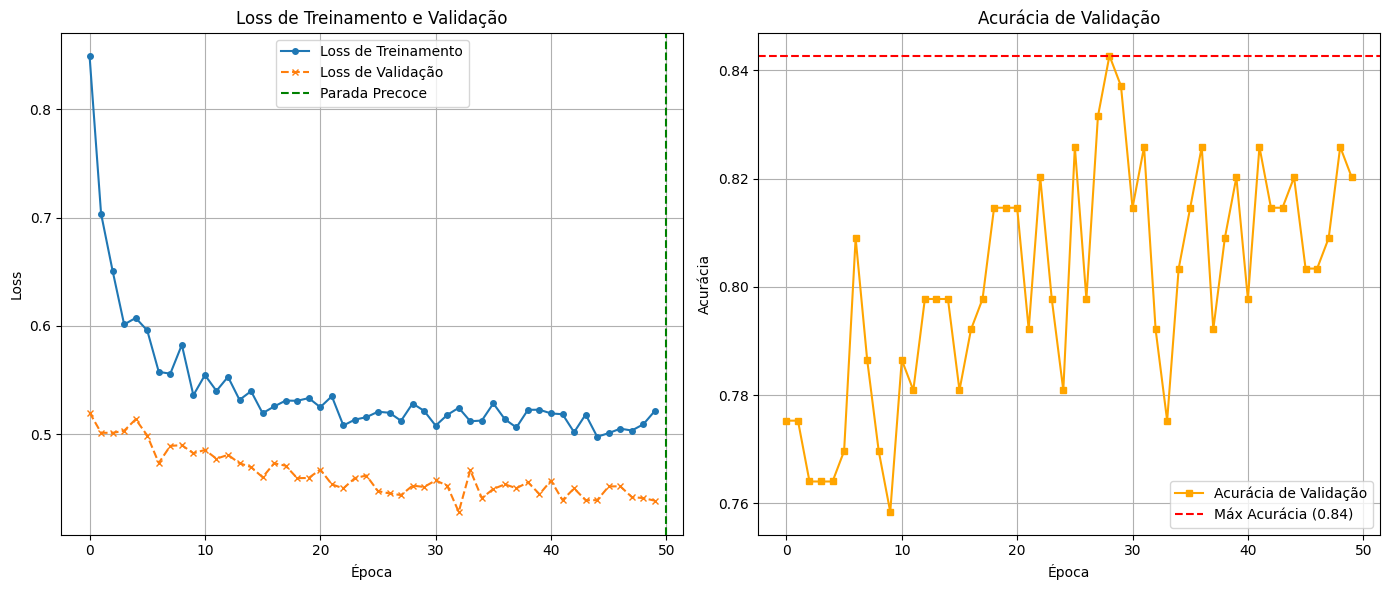

In [771]:
historico = treinar_modelo(net, train_loader, val_loader, criterion, optimizer, args['epoch_num'], args['device'])

def plot_training_results(historico):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(historico['train_loss'], label='Loss de Treinamento', linestyle='-', marker='o', markersize=4)
    plt.plot(historico['val_loss'], label='Loss de Validação', linestyle='--', marker='x', markersize=4)
    plt.axvline(len(historico['val_loss']), color='green', linestyle='--', label='Parada Precoce')
    plt.title('Loss de Treinamento e Validação')
    plt.xlabel('Época')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(historico['val_accuracy'], label='Acurácia de Validação', linestyle='-', color='orange', marker='s', markersize=4)
    max_accuracy = max(historico['val_accuracy'])
    plt.axhline(max_accuracy, color='red', linestyle='--', label=f'Máx Acurácia ({max_accuracy:.2f})')
    plt.title('Acurácia de Validação')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('treinamento_validacao.png', dpi=300)  
    plt.show()


plot_training_results(historico)

In [772]:
print(f"Resultados da última época (Época {args['epoch_num']}):")
print(f"Loss de Treino: {historico['train_loss'][-1]:.4f}")
print(f"Acurácia de Validação: {historico['val_accuracy'][-1]:.4f}")
print(f"Tempo de Treino: {historico['tempo_treino'][-1]:.2f} segundos")
print(f"Tempo de Validação: {historico['tempo_val'][-1]:.2f} segundos")

Resultados da última época (Época 50):
Loss de Treino: 0.5215
Acurácia de Validação: 0.8202
Tempo de Treino: 0.13 segundos
Tempo de Validação: 0.01 segundos


## Fazendo predições e comparando com os resultados do teste

In [773]:
def predict(model, test_loader, device):
    model.eval()  
    predicoes = []
    
    with torch.no_grad(): 
        for dados in test_loader:
            dados = dados.to(device)
            outputs = model(dados)
            preds = (outputs.squeeze() > 0.5).cpu().numpy() 
            predicoes.extend(preds)
    
    return np.array(predicoes)

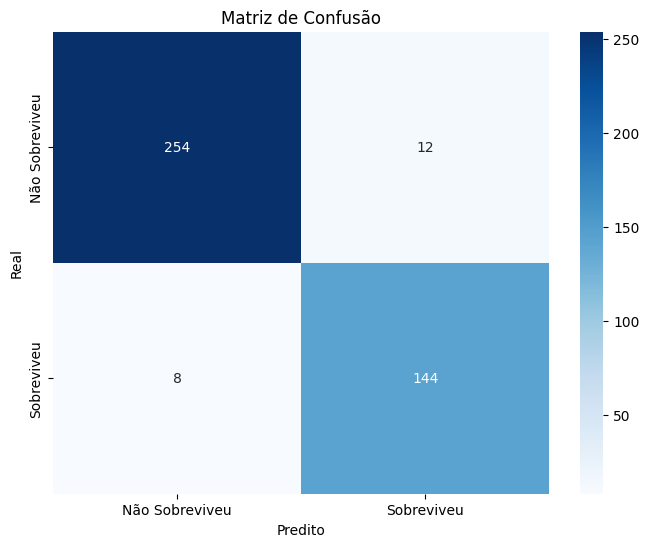


Acurácia no conjunto de teste: 0.9522

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       266
           1       0.92      0.95      0.94       152

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418


Exemplos de predições diferentes do baseline:
+-----+---------------+-------------+---------------------+
|     |   PassengerId |   Predicted |   Gender_Submission |
+=====+===============+=============+=====================+
|  23 |           915 |           1 |                   0 |
+-----+---------------+-------------+---------------------+
|  32 |           924 |           0 |                   1 |
+-----+---------------+-------------+---------------------+
|  33 |           925 |           0 |                   1 |
+-----+---------------+-------------+---------------------+
|  64 |           

In [774]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

gender_submission = pd.read_csv('../data/gender_submission.csv')

predicoes = predict(net, test_loader, args['device'])

resultados = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predicoes.astype(int)
})

comparacao = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Predicted': predicoes.astype(int),
    'Gender_Submission': gender_submission['Survived']
})

accuracy = accuracy_score(gender_submission['Survived'], predicoes)
conf_matrix = confusion_matrix(gender_submission['Survived'], predicoes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Sobreviveu', 'Sobreviveu'],
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

print(f"\nAcurácia no conjunto de teste: {accuracy:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(gender_submission['Survived'], predicoes))

discordancias = comparacao[comparacao['Predicted'] != comparacao['Gender_Submission']]
print("\nExemplos de predições diferentes do baseline:")
print(tabulate(discordancias.head(10), headers='keys', tablefmt='grid'))

resultados.to_csv('predicoes_deep_learning.csv', index=False)